This program is designed to accept x and y data as an input, as well as an uncertainty value for the y-direction, either from a text file, or through manual input, and apply a linefit to the data and graph it as a scatter plot with a 𝐥𝐢𝐧𝐞𝐚𝐫 trendline.
The code uses libraries such as NumPy, matplotlib, and SciPy.
Heavy use of documentation helped facilitate the making of this program.
I think the program works quite efficiently to fit data to a plot, as the NumPy and SciPy programs use very solid math to calculate the trend line. It does get more consistant with more data plots, and less consistient with less plots. I think the design of either a text input or manual input is helpful, and the code looks clean and concise.

In [1]:
#dependencies
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *

In [2]:
#importing example data from text file, using numpy to sort into three seperate arrays, displaying the arrays afterward for confirmation
x=np.loadtxt("C:/Users/Oran1/OneDrive - University of Kansas/Research/datav3.txt",dtype='float',usecols=[0])
y=np.loadtxt("C:/Users/Oran1/OneDrive - University of Kansas/Research/datav3.txt",dtype='float',usecols=[1])
yerr=np.loadtxt("C:/Users/Oran1/OneDrive - University of Kansas/Research/datav3.txt",dtype='float',usecols=[2])
print("x =",x,str("\n"),"y =",y,str("\n"),"y-error =",yerr,str("\n"))

x = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39.] 
 y = [ 49.1893  54.8448  40.1114  26.1809  40.7383  71.9467  33.5833 131.364
  68.197  131.095   37.2666 189.868  125.03    99.6729 127.271  106.426
 153.886  153.381   94.8586 136.245  166.235  139.36   136.896  148.319
 144.289  172.145  204.599  178.184  207.157  268.206  197.244  291.271
 261.346  240.729  211.113  223.606  258.455  226.111  276.129  238.149 ] 
 y-error = [30. 10. 30. 12. 20. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 12.  1. 30.
 41. 30. 30. 30. 30. 30. 30. 14. 30. 30. 30. 24. 30. 30. 30. 30. 32. 30.
 12. 30. 14. 30.] 



In [3]:
#feeding example data into polyfit
trend=np.polyfit(x,y,1)
trendpoly=np.poly1d(trend)

Polyfit is a numpy program designed to fit a line to data (albeit without the ability to use error uncertanties).
Parameters for polyfit(x,y,#)
x = Array of x values, y = Array of y values, # = Polynomial degree

Trendline: y=5.864784559099441x+37.154171097561004


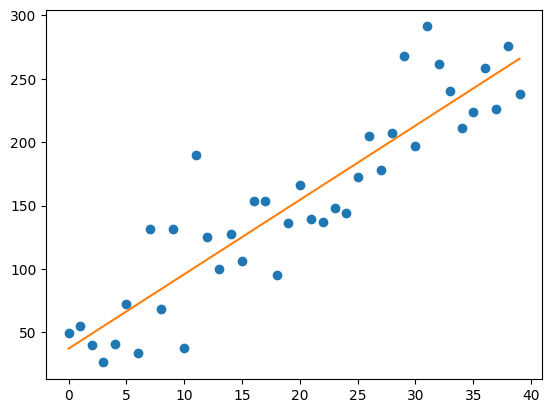

In [12]:
#using matplotlib to plot the fit line and raw data on a graph
plt.plot(x,y,'o')
plt.plot(x,trendpoly(x))
print("Trendline: y="+str(trend[0])+"x+"+str(trend[1]))

In [5]:
#pushing data into a SciPy's ODR line-fitting program (which supports uncertainty) in line fitting
data = RealData(x, y, sy=yerr)
odr = ODR(data, model=unilinear)
output = odr.run()
slope, intercept = output.beta
output.pprint()

Beta: [ 6.21743838 36.33722504]
Beta Std Error: [0.37308515 8.06805938]
Beta Covariance: [[ 0.08516046 -1.57565557]
 [-1.57565557 39.8254079 ]]
Residual Variance: 1.6344737074521738
Inverse Condition #: 0.023544732077209852
Reason(s) for Halting:
  Sum of squares convergence


Parameters for ODR(data, model)
data = data input as an RealData set of array's, model = model for fit (exponential/quadratic/unilinear

In [6]:
def linear_func(p, x):
   m, c = p
   return m*x + c
linear_model = Model(linear_func)

In [7]:
#translating ODR data into plottable format
x_fit = np.linspace(x[0], x[-1])
y_fit = linear_func(output.beta, x_fit)

Trendline: y=6.217438375731326x+36.337225042604246


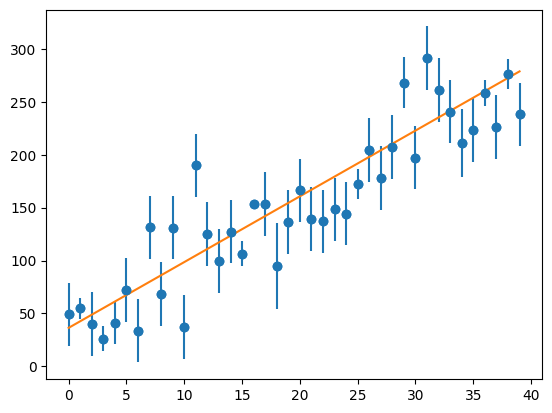

In [8]:
#plotting ODR data on a graph with error bars and an adapted line
plt.scatter(x,y)
plt.errorbar(x, y, yerr = yerr, fmt ='o')
plt.plot(x_fit, y_fit)
print("Trendline: y="+str(slope)+"x+"+str(intercept))
plt.show()

This is the full program using ideas I learned from the previous segments.

In [10]:
#dependancies
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
#using an if segment to let the user choose a method of data entry
inp = input("Type 'file' to input a file named input.txt as data, or 'manual' to manually enter data.")
if inp == "file":
    usrx=np.loadtxt("C:/Users/Oran1/OneDrive - University of Kansas/Research/input.txt",dtype='float',usecols=[0])
    usry=np.loadtxt("C:/Users/Oran1/OneDrive - University of Kansas/Research/input.txt",dtype='float',usecols=[1])
    usryerr=np.loadtxt("C:/Users/Oran1/OneDrive - University of Kansas/Research/input.txt",dtype='float',usecols=[2])
    print("x =",usrx,str("\n"),"y =",usry,str("\n"),"y-error =",usryerr,str("\n"))
#segment for ODR line fitting for text file data
    data = RealData(usrx, usry, sy=usryerr)
    odr = ODR(data, model=unilinear)
    output = odr.run()
    slope, intercept = output.beta
    output.pprint()
    def linear_func(p, x):
       m, c = p
       return m*x + c
    linear_model = Model(linear_func)
    x_fit = np.linspace(usrx[0], usrx[-1])
    y_fit = linear_func(output.beta, x_fit)
elif inp == "manual":
#translates three user inputs of data into three seperate arrays for data conversion and fitting 
    usrx = np.array(input("Input X values: (int32 seperated by spaces)").split(), dtype='float')
    print("x = "+str(usrx))
    usry = np.array(input("Input Y values: (int32 seperated by spaces)").split(), dtype='float')
    print("y = "+str(usry))
    usryerr = np.array(input("Input Y-error values: (int32 seperated by spaces)").split(), dtype='float')
    print("dy = "+str(usryerr))
#segment for ODR line fitting for input data
    data = RealData(usrx, usry, sy=usryerr)
    odr = ODR(data, model=unilinear)
    output = odr.run()
    slope, intercept = output.beta
    output.pprint()
#translates ODR output into usable format
    def linear_func(p, x):
       m, c = p
       return m*x + c
    linear_model = Model(linear_func)
    x_fit = np.linspace(usrx[0], usrx[-1])
    y_fit = linear_func(output.beta, x_fit)
#error segment for nonaccepted input
else:
   print('Error! Please type either "file" or "manual"')

Type 'file' to input a file named input.txt as data, or 'manual' to manually enter data. file


x = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39.] 
 y = [ 49.1893  54.8448  40.1114  26.1809  40.7383  71.9467  33.5833 131.364
  68.197  131.095   37.2666 189.868  125.03    99.6729 127.271  106.426
 153.886  153.381   94.8586 136.245  166.235  139.36   136.896  148.319
 144.289  172.145  204.599  178.184  207.157  268.206  197.244  291.271
 261.346  240.729  211.113  223.606  258.455  226.111  276.129  238.149 ] 
 y-error = [30. 10. 30. 12. 20. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 12.  1. 30.
 41. 30. 30. 30. 30. 30. 30. 14. 30. 30. 30. 24. 30. 30. 30. 30. 32. 30.
 12. 30. 14. 30.] 

Beta: [ 6.21743838 36.33722504]
Beta Std Error: [0.37308515 8.06805938]
Beta Covariance: [[ 0.08516046 -1.57565557]
 [-1.57565557 39.8254079 ]]
Residual Variance: 1.6344737074521738
Inverse Condition #: 0.023544732077209852
Reason(s) for Halting:
  Sum of squares convergence


Trendline: y=6.217438375731326x+36.337225042604246


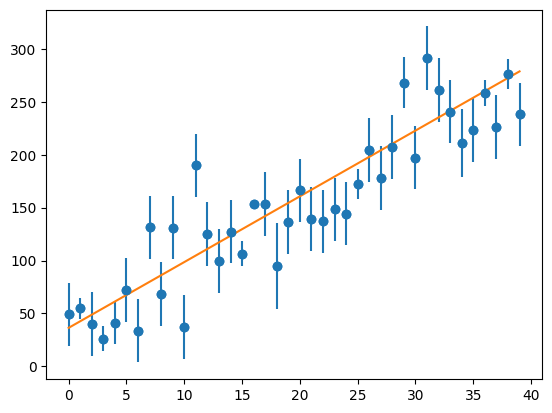

In [11]:
#plots fitted data on a graph with a trendline
plt.scatter(usrx,usry)
plt.errorbar(usrx, usry, yerr = usryerr, fmt ='o')
plt.plot(x_fit, y_fit)
print("Trendline: y="+str(slope)+"x+"+str(intercept))
plt.show()